In [1]:
import matplotlib.pyplot as plt
import numpy as np

from evolution_of_cooperation.iterative_pd import IterativePrisionerDilemma
from evolution_of_cooperation import strategies

np.random.seed(4321)

In [2]:
player1 = strategies.TitForTat()
player5 = strategies.Shubik()
player7 = strategies.Friedman()
player8 = strategies.DavisCuny()
player11 = strategies.Feld()
player12 = strategies.Joss()
player13 = strategies.Tullock()
player15 = strategies.Random()

players = [player1, player5, player7, player8, player11, player12, player13, player15]
names = ['TitForTat', 'Shubik', 'Friedman', 'DavisCuny', 'Feld',
         'Joss', 'Tullock', 'Random']
num_players = len(players)
results = np.nan * np.ones((num_players, num_players))
game = IterativePrisionerDilemma(N=200, payoff_CC=3, payoff_CD=0, payoff_DC=5, payoff_DD=1)

for i in range(num_players):
    for j in range(i, num_players):
        
        history, outcomes, payoff = game.run(players[i], players[j])
        results[i, j] = payoff[-1, 0]
        results[j, i] = payoff[-1, 1]
        
cumulative = results.mean(axis=1)

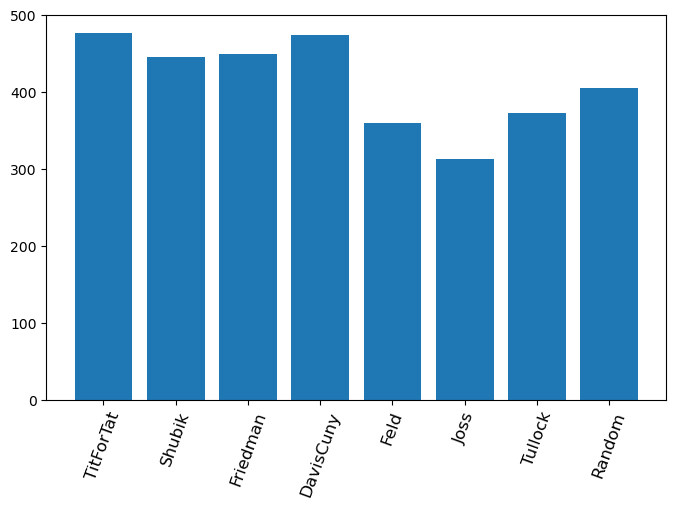

In [3]:
plt.figure(figsize=(8, 5))
plt.bar(names, cumulative)
plt.xticks(fontsize=12, rotation=70)
plt.show()